## A Sequential Neural Network multi-class classifier on the 470-feature data set.

Uses 300-200-100 dense layers.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dense, Dropout
from keras.metrics import SparseCategoricalAccuracy
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

2024-04-22 14:04:34.889449: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 14:04:34.892317: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 14:04:34.927059: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 14:04:35.561717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
features = df.iloc[:,0:469]
labels = df['Class']

In [4]:
X=features
y=np.ravel(labels)

In [5]:
y

array([1, 1, 1, ..., 5, 5, 5])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train.shape

(9278, 469)

In [9]:
model = Sequential()
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(rate=.5, seed=42))
model.add(Dense(6, activation='softmax'))

2024-04-22 14:04:37.048817: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-04-22 14:04:37.048866: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: orion
2024-04-22 14:04:37.048877: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: orion
2024-04-22 14:04:37.049015: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.171.4
2024-04-22 14:04:37.049051: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 525.147.5
2024-04-22 14:04:37.049061: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:251] kernel version 525.147.5 does not match DSO version 535.171.4 -- cannot find working devices in this configuration


In [10]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=500)

Epoch 1/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4461 - loss: 1.5285
Epoch 2/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6580 - loss: 0.9896
Epoch 3/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7232 - loss: 0.8230
Epoch 4/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7596 - loss: 0.7335
Epoch 5/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7927 - loss: 0.6606
Epoch 6/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.6045
Epoch 7/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8172 - loss: 0.5621
Epoch 8/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8444 - loss: 0.5144
Epoch 9/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8452 - loss: 0.4932
Epoch 10/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8553 - loss: 0.4667
Epoch 11/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8597 - loss: 0.4462
Epoch 12/500
290/290 ━━━━━━━━━━━━━━━━━━━━

In [11]:
model.evaluate(X_test, y_test)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9225 - loss: 1.3335


[1.870208740234375, 0.9198275804519653]

In [12]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [13]:
y_test_pred

array([3, 3, 5, ..., 5, 5, 4])

In [14]:
confusion_matrix(y_test, y_test_pred)

array([[223,   8,   4,  15,  12],
       [ 14, 367,  11,  15,  17],
       [  0,   3, 780,   2,   1],
       [ 12,  12,   2, 456,  18],
       [ 11,   6,   7,  16, 308]])

In [15]:
multilabel_confusion_matrix(y_test,y_test_pred)

array([[[2021,   37],
        [  39,  223]],

       [[1867,   29],
        [  57,  367]],

       [[1510,   24],
        [   6,  780]],

       [[1772,   48],
        [  44,  456]],

       [[1924,   48],
        [  40,  308]]])

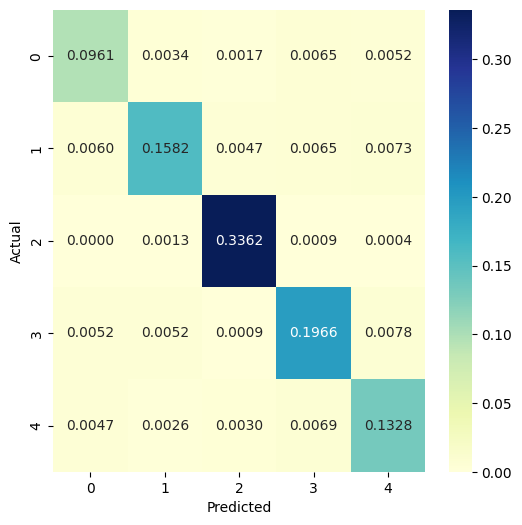

In [16]:
cm = confusion_matrix(y_test, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

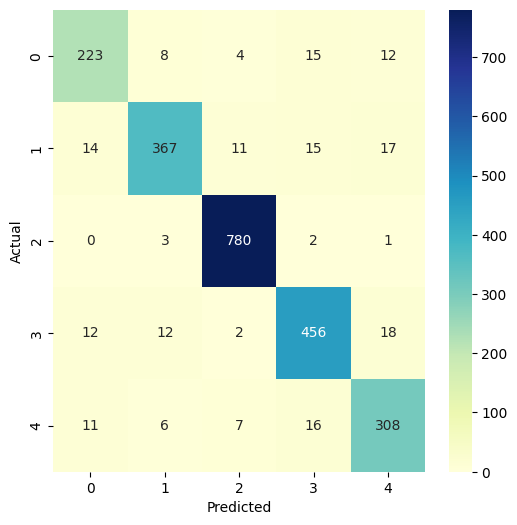

In [17]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)